In [1]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
import matplotlib.pyplot as plt
import pandas as pd
import re
import spacy

[nltk_data] Downloading package punkt to /home/oumar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/oumar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
sculptors = pd.read_csv('Text_Data/biography_sculptor.csv')
sculptors.head()

,Category,Name,Content
0,Sculptors,Wäinö Aaltonen,Wäinö Valdemar Aaltonen (8 March 1894 – 30 May...
1,Sculptors,Johannes Josephus Aarts,"Johannes Josephus Aarts (18 August 1871, in Th..."
2,Sculptors,Magdalena Abakanowicz,Magdalena Abakanowicz (Polish pronunciation: [...
3,Sculptors,Elfriede Abbe,"Elfriede Martha Abbe (February 6, 1919 – Decem..."
4,Sculptors,Louise Abbéma,Louise Abbéma (30 October 1853 – 29 July 1927)...


In [3]:
cs = pd.read_csv('Text_Data/biography_cs.csv')
cs.head()

,Category,Name,Content
0,Computer_Scientists,Atta ur Rehman Khan,Atta ur Rehman Khan (Urdu: عطا الرحمن خان) is ...
1,Computer_Scientists,Wil van der Aalst,Willibrordus Martinus Pancratius van der Aalst...
2,Computer_Scientists,Scott Aaronson,"Scott Joel Aaronson (born May 21, 1981) is an ..."
3,Computer_Scientists,Rediet Abebe,Rediet Abebe (Amharic: ረድኤት አበበ) is an Ethiopi...
4,Computer_Scientists,Hal Abelson,"Harold Abelson (born April 26, 1947) is an Ame..."


In [9]:
import string
punctuation = string.punctuation

In [13]:
def remove_stopwords(dataframe):
    dataframe['Content'] = dataframe['Content'].apply(lambda x: ''.join(char for char in x if char not in punctuation))
    # remove stopwords
    stop_words = set(stopwords.words('english'))
    dataframe['Content'] = dataframe['Content'].apply(lambda x: x.lower())
    dataframe['Content'] = dataframe['Content'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in (stop_words)])) 
    return dataframe


In [14]:
sculptors = remove_stopwords(sculptors)
# sculptors.to_csv('cleaned_sculptors.csv', index=False) 
sculptors.head()


,Category,Name,Content
0,Sculptors,Wäinö Aaltonen,wäinö valdemar aaltonen 8 march 1894 – 30 may ...
1,Sculptors,Johannes Josephus Aarts,johannes josephus aarts 18 august 1871 hague –...
2,Sculptors,Magdalena Abakanowicz,magdalena abakanowicz polish pronunciation maɡ...
3,Sculptors,Elfriede Abbe,elfriede martha abbe february 6 1919 – decembe...
4,Sculptors,Louise Abbéma,louise abbéma 30 october 1853 – 29 july 1927 f...


In [20]:
computer_sc = remove_stopwords(cs)
computer_sc.to_csv('cleaned_computer_sc.csv', index=False) 
computer_sc.head()

,Category,Name,Content
0,Computer_Scientists,Atta ur Rehman Khan,atta ur rehman khan urdu عطا الرحمن خان comput...
1,Computer_Scientists,Wil van der Aalst,willibrordus martinus pancratius van der aalst...
2,Computer_Scientists,Scott Aaronson,scott joel aaronson born may 21 1981 american ...
3,Computer_Scientists,Rediet Abebe,rediet abebe amharic ረድኤት አበበ ethiopian comput...
4,Computer_Scientists,Hal Abelson,harold abelson born april 26 1947 american mat...


In [9]:
def most_frequent_words(dataframe, n):
    # get most frequent words
    patern = r'[=–]'
    dataframe['Content'] = dataframe['Content'].apply(lambda x: re.sub(patern, ' ', x))
    all_words = ' '.join(dataframe['Content']).split()
    fdist = nltk.FreqDist(all_words)
    words_df = pd.DataFrame(fdist.most_common(n), columns=["Word", "Frequency"])
    return words_df


print(most_frequent_words(sculptors, 50))


           Word  Frequency
0           Art        272
1          work        252
2        Museum        203
3          also        197
4         works        172
5           New        166
6           art        147
7            de        142
8    sculptures        128
9     sculpture        127
10        first        112
11   University        105
12     American        100
13         Arts         95
14       artist         94
15         born         92
16         York         91
17     sculptor         90
18      Gallery         90
19         made         86
20          one         84
21          San         84
22   References         83
23        known         80
24         ISBN         78
25          two         74
26      Academy         74
27    Sculpture         72
28        years         71
29     National         68
30   exhibition         67
31         Art,         66
32       public         65
33        links         64
34      created         64
35     External         62
3

In [35]:
print(most_frequent_words(computer_sc, 50))

             Word  Frequency
0      University       2386
1        computer       2273
2            also       1569
3        Computer       1517
4           first       1331
5            work       1237
6         Science       1068
7        research        981
8             one        888
9           Award        884
10       received        833
11    programming        832
12        science        771
13           ISBN        752
14       Research        731
15       American        731
16         became        683
17           John        673
18      Institute        671
19       software        654
20       National        615
21     References        598
22       language        588
23            New        580
24      professor        578
25         worked        566
26         member        564
27      Computing        555
28          known        549
29           used        547
30            ACM        542
31    development        525
32    Information        522
33          wo

### World cloud

In [13]:
from wordcloud import WordCloud
def display_wordcloud(dataframe):
    # display wordcloud
    all_words = ' '.join(dataframe['Content'])
    stop_words = set(stopwords.words('english'))
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate(all_words)
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()
    return wordcloud
   

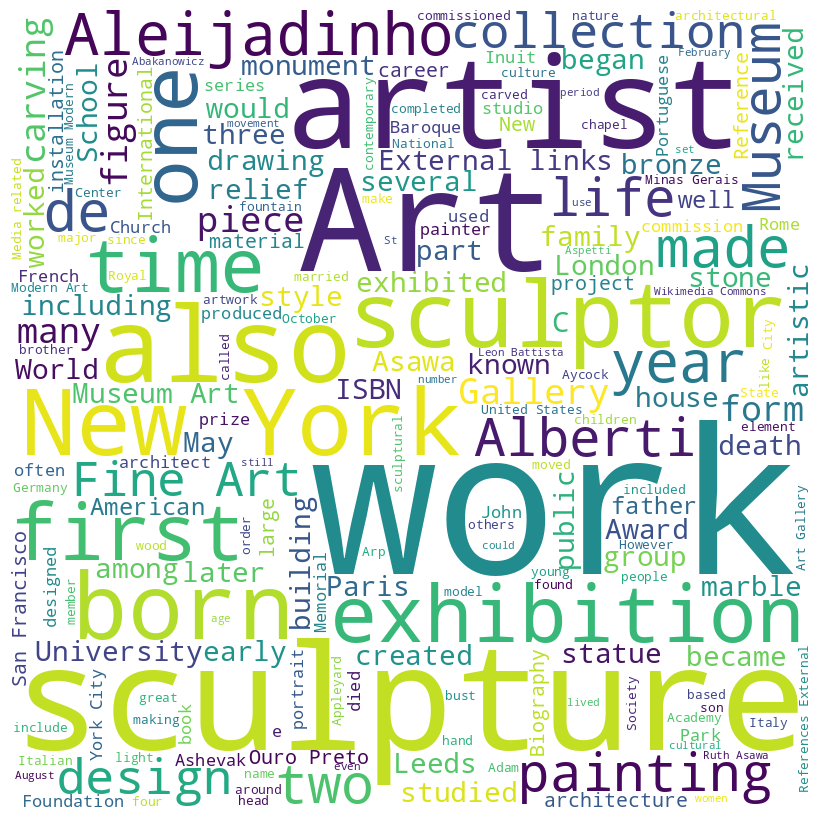

In [14]:
print(display_wordcloud(sculptors))

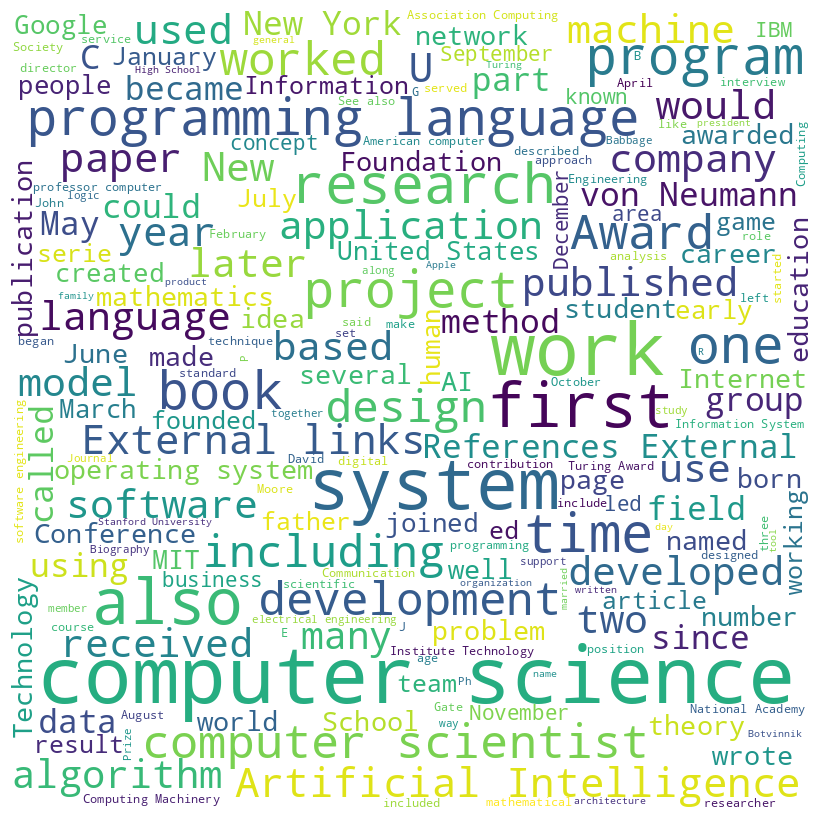

In [15]:
print(display_wordcloud(computer_sc))

### Sentences 
 

In [10]:
def sentence_segmentation(dataframe):
    nlp = spacy.load('en_core_web_sm')
    all_authors = []
    for i, row in dataframe.iterrows():
        author = row['Name']
        text = nlp(row['Content'])
        sentence_count = 0
        sentences = [sent.text for sent in text.sents]
        for sent in text.sents:
            sentence_count += 1
        all_authors.append((author, sentence_count, sentences))
    df = pd.DataFrame(all_authors, columns=['Author', 'Sentence Count', 'Sentences'])
    min = df['Sentence Count'].min()
    max = df['Sentence Count'].max()
    avg = df['Sentence Count'].mean()
    print("Min: ", min)
    print("Max: ", max)
    print("Avg: ", avg)
    plt.hist(df['Sentence Count'], bins=50)
    plt.show()
    plt.boxplot(df['Sentence Count'])
    plt.show()
    # plt.hist([len(sent.split()) for sent in all_sentences], bins=50)
    # plt.show()
    # plt.boxplot([len(sent.split()) for sent in all_sentences])
    # print("Number of sentences: ", len(all_sentences))
    # return all_sentences
    return df




Min:  1
Max:  532
Avg:  40.52577319587629


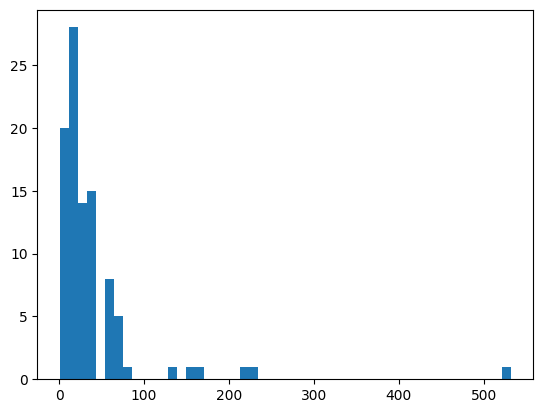

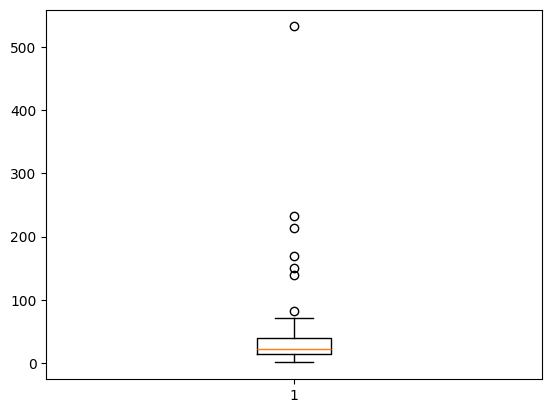

,Author,Sentence Count,Sentences
0,Wäinö Aaltonen,32,[Wäinö Valdemar Aaltonen (8 March 1894 30 Ma...
1,Johannes Josephus Aarts,15,"[Johannes Josephus Aarts (18 August 1871, Hagu..."
2,Magdalena Abakanowicz,151,[Magdalena Abakanowicz (Polish pronunciation: ...
3,Elfriede Abbe,33,"[Elfriede Martha Abbe (February 6, 1919 Dece..."
4,Louise Abbéma,28,[Louise Abbéma (30 October 1853 29 July 1927...


In [11]:
sculptors_sentence = sentence_segmentation(sculptors)
sculptors_sentence.head()


In [13]:
sculptors_sentence['Sentence Count'] = sculptors_sentence[sculptors_sentence['Sentence Count'] == 532]
sculptors_sentence.head()

ValueError: Columns must be same length as key

Min:  1
Max:  589
Avg:  50.088235294117645


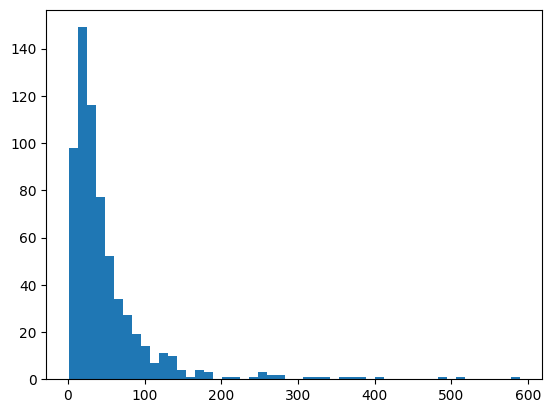

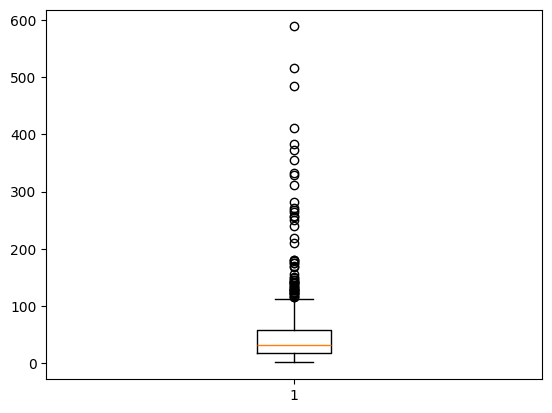

                                       Author  Sentence Count
0                         Atta ur Rehman Khan             128
1                           Wil van der Aalst              50
2                              Scott Aaronson              46
3                                Rediet Abebe              50
4                                 Hal Abelson              37
..                                        ...             ...
641      List of pioneers in computer science              28
642                       List of programmers              45
643  List of programming language researchers              51
644             List of Russian IT developers               7
645     List of Slovenian computer scientists               7

[646 rows x 2 columns]


In [36]:
print(sentence_segmentation(computer_sc))

In [17]:
def bigrams(dataframe):
    all_bigrams = []
    dataframe['Content'] = dataframe['Content'].apply(lambda x: re.sub(r'[^\w\s]', ' ', x))
    for i, row in dataframe.iterrows():
        text = nltk.word_tokenize(row['Content'])
        bigrams = list(nltk.bigrams(text))
        all_bigrams.extend(bigrams)
    fdist = nltk.FreqDist(all_bigrams)
    bigrams_df = pd.DataFrame(fdist.most_common(50), columns=["Bigram", "Frequency"])
    return bigrams_df


In [19]:
print(bigrams(sculptors))

                    Bigram  Frequency
0              (New, York)        133
1        (External, links)         62
2            (Museum, Art)         52
3             (Fine, Arts)         49
4         (San, Francisco)         48
5            (Ouro, Preto)         47
6                (s, work)         43
7             (York, City)         38
8         (in, Portuguese)         37
9         (United, States)         36
10          (Art, Gallery)         35
11         (Minas, Gerais)         33
12           (Modern, Art)         31
13        (Museum, Modern)         30
14  (References, External)         29
15        (Media, related)         29
16    (Wikimedia, Commons)         29
17             (ISBN, 978)         29
18        (Leon, Battista)         29
19           (Ruth, Asawa)         29
20            (Ashevak, s)         28
21     (Battista, Alberti)         27
22           (Early, life)         26
23           (Art, Museum)         25
24     (National, Gallery)         23
25          

In [38]:
print(bigrams(computer_sc))

                        Bigram  Frequency
0          (computer, science)        812
1          (Computer, Science)        711
2            (External, links)        474
3        (computer, scientist)        462
4                  (ISBN, 978)        381
5       (References, External)        366
6                  (New, York)        348
7      (programming, language)        336
8                    (doi, 10)        324
9                      (Ph, D)        289
10              (von, Neumann)        269
11            (United, States)        261
12  (Artificial, Intelligence)        261
13     (Institute, Technology)        226
14                   (ISBN, 0)        219
15      (Computing, Machinery)        217
16         (National, Academy)        217
17    (Association, Computing)        213
18  (artificial, intelligence)        212
19                 (See, also)        194
20    (programming, languages)        192
21                      (U, S)        184
22             (Turing, Award)    

6
